In [11]:
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
import time

In [2]:
### Helper functions
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def calculate_Energy(α, J) :
    """
    Calculates an array of energies that each element of α contributes to the total energy
    To calculate the energy, use np.sum(E) * (-J)
    """
    # Shifts the matrix α_t in 4 different directions and adds the result, then multiplies pointwise by α
    E = α[1:-1,1:-1] * (α[1:-1,:-2] + α[:-2,1:-1] + α[1:-1,2:] + α[2:,1:-1])
    return -J * np.sum(E) / 4 # Divides by 4 for double counted energies

def update_Energy(α, r, J) :
    """
    Flips a particle and recalculates the energy
    """
    i = r[0]
    j = r[1]
    α_t = np.copy(α)
    α_t[i,j] *= -1
    return α_t, calculate_Energy(α_t, J)

In [18]:
### Main Algorithm
# Parameters
# t0 = time.perf_counter()
N = 30 # Number of rows and columns
J = -1 # 
max_iter = 1000 # Number of iterations
temperatures = np.linspace(5,0.01,30) # List of temperatures between T=0.01 and T=5

Energy_plot = []

# Initialize α and energy matrix E
α_0 = (rng.randint(0, 2, [N, N])*2-1)
# Surounds the matrix α with 0s
α_0 = np.pad(α_0, 1, pad_with, padder=0)
E = calculate_Energy(α_0, J)
print("Starting energy:", E)

α = np.copy(α_0)
for T in temperatures :
    for t in range(0, max_iter) :
        # Pick a random particle to flip
        r = rng.randint(1, N+1, 2)
        α_t, E_t = update_Energy(α, r, J)
        # Test if we should accept the change
        if ( (E_t < E) | (np.exp(-(np.abs(E_t-E))/T) > rng.rand()) ) :
            α = np.copy(α_t)
            E = E_t
        # Adds to the list of computed energies
        Energy_plot.append(E)

# Performs 10* more iterations at the lowest temperature
for t in range(0, max_iter*10) :
    r = rng.randint(0, N, 2)
    α_t, E_t = update_Energy(α, r, J)
    if ( (E_t < E) | (np.exp(-(np.abs(E_t-E))/T) > rng.rand()) ) :
        α = np.copy(α_t)
        E = E_t
    Energy_plot.append(E)

print("Final energy:", calculate_Energy(α, J))
# tf = time.perf_counter()
# print(tf - t0)

Starting energy: 19.0
Final energy: -772.0


Text(0, 0.5, 'Energy')

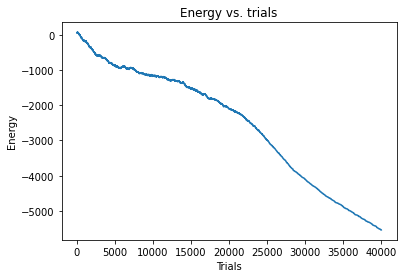

In [14]:
plt.plot(Energy_plot)
plt.title("Energy vs. trials")
plt.xlabel("Trials")
plt.ylabel("Energy")
# plt.savefig("test.pdf",bbox_inches='tight')

Inital spin state


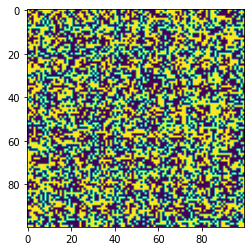

In [15]:
plt.imshow(α_0[1:-1,1:-1])
print("Inital spin state")

Final spin state


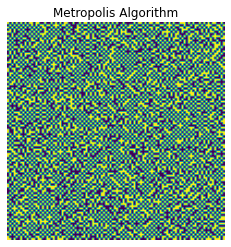

In [16]:
plt.imshow(α[1:-1,1:-1])
plt.axis('off')
plt.title("Metropolis Algorithm")
print("Final spin state")